# Import statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Get data

## load datasets
- download from https://www.kaggle.com/meetnagadia/share-price-of-top-electric-car-company

In [2]:
def loadData(x):
    path='./data/'+x+'.csv'
    x=pd.read_csv(path).set_index('Date')
    return x

In [3]:
Volkswagen=loadData('Volkswagen').iloc[:,:-2]
bmw=loadData('bmw').iloc[:,:-2]
tesla=loadData('tesla').iloc[:,:-2]
nissian=loadData('nissian').iloc[:,:-2]
honda=loadData('honda').iloc[:,:-2]

## SP500和CSI300
方法参见：https://zhuanlan.zhihu.com/p/146726815

In [12]:
# sp500 = pdr.DataReader(name='^GSPC',
#                        data_source='yahoo',
#                        start='2016-08-24',
#                        end='2021-08-23')
# sp500.to_csv('./data/sp500.csv')

In [4]:
sp500 = loadData('sp500').iloc[:,:-2]
sp500

,High,Low,Open,Close
Date,,,,
2016-08-23,2193.419922,2186.800049,2187.810059,2186.899902
2016-08-24,2186.659912,2171.250000,2185.090088,2175.439941
2016-08-25,2179.000000,2169.739990,2173.290039,2172.469971
2016-08-26,2187.939941,2160.389893,2175.100098,2169.040039
2016-08-29,2183.479980,2170.189941,2170.189941,2180.379883
...,...,...,...,...
2021-08-17,4462.120117,4417.830078,4462.120117,4448.080078
2021-08-18,4454.319824,4397.589844,4440.939941,4400.270020
2021-08-19,4418.609863,4367.729980,4382.439941,4405.799805


In [84]:
# import tushare as ts

# CSI300 = ts.get_k_data('hs300', start='2016-08-24',
#                        end='2021-08-23').reset_index(drop=True)
# CSI300

本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


,date,open,close,high,low,volume,code
0,2016-08-24,3341.93,3329.86,3348.13,3323.73,81191429.0,hs300
1,2016-08-25,3314.08,3308.97,3315.08,3279.81,100589153.0,hs300
2,2016-08-26,3312.50,3307.09,3328.95,3301.74,81530691.0,hs300
3,2016-08-29,3306.57,3307.78,3315.08,3297.07,77036333.0,hs300
4,2016-08-30,3310.32,3311.99,3325.12,3304.60,75725987.0,hs300
...,...,...,...,...,...,...,...
1211,2021-08-17,4935.00,4837.40,4967.56,4823.39,187573472.0,hs300
1212,2021-08-18,4838.47,4894.24,4909.54,4818.90,197474378.0,hs300
1213,2021-08-19,4886.56,4862.14,4893.47,4839.57,201711719.0,hs300
1214,2021-08-20,4817.49,4769.27,4835.15,4720.83,177635810.0,hs300


In [85]:
# CSI300 = CSI300.iloc[:, :-1]
# for name in CSI300.columns:
#     CSI300 = CSI300.rename(columns={name: name.title()})

In [86]:
# csi300 = CSI300.copy().set_index('Date')
# csi300

,Open,Close,High,Low,Volume
Date,,,,,
2016-08-24,3341.93,3329.86,3348.13,3323.73,81191429.0
2016-08-25,3314.08,3308.97,3315.08,3279.81,100589153.0
2016-08-26,3312.50,3307.09,3328.95,3301.74,81530691.0
2016-08-29,3306.57,3307.78,3315.08,3297.07,77036333.0
2016-08-30,3310.32,3311.99,3325.12,3304.60,75725987.0
...,...,...,...,...,...
2021-08-17,4935.00,4837.40,4967.56,4823.39,187573472.0
2021-08-18,4838.47,4894.24,4909.54,4818.90,197474378.0
2021-08-19,4886.56,4862.14,4893.47,4839.57,201711719.0


In [87]:
# csi300.to_csv('./data/CSI300.csv')

In [5]:
CSI300 = loadData('CSI300').iloc[:,:-1]
CSI300

,Open,Close,High,Low
Date,,,,
2016-08-24,3341.93,3329.86,3348.13,3323.73
2016-08-25,3314.08,3308.97,3315.08,3279.81
2016-08-26,3312.50,3307.09,3328.95,3301.74
2016-08-29,3306.57,3307.78,3315.08,3297.07
2016-08-30,3310.32,3311.99,3325.12,3304.60
...,...,...,...,...
2021-08-17,4935.00,4837.40,4967.56,4823.39
2021-08-18,4838.47,4894.24,4909.54,4818.90
2021-08-19,4886.56,4862.14,4893.47,4839.57


# Preparation

In [6]:
# Column Name Change
def name_change(df, df_name):
    for name in df.columns:
        df = df.rename(columns = {name: (df_name +"_"+ name)})
    return df

In [7]:
Volkswagen = name_change(Volkswagen, "Volkswagen")
bmw = name_change(bmw, "bmw")
tesla = name_change(tesla, "tesla")
nissian = name_change(nissian, "nissian")
honda = name_change(honda, "honda")
sp500 = name_change(sp500, "SP500")
CSI300 = name_change(CSI300, "CSI300")

In [8]:
def mergeData(datas):
    total_d = pd.DataFrame()
    for data in datas:
        if total_d.shape[0]==0:
            total_d = data
        else:
            total_d = total_d.join(data)
    return total_d

In [9]:
DATA = mergeData([bmw, Volkswagen, tesla, nissian, honda, sp500, CSI300])
DATA

,bmw_Open,bmw_High,bmw_Low,bmw_Close,Volkswagen_Open,Volkswagen_High,Volkswagen_Low,Volkswagen_Close,tesla_Open,tesla_High,...,honda_Low,honda_Close,SP500_High,SP500_Low,SP500_Open,SP500_Close,CSI300_Open,CSI300_Close,CSI300_High,CSI300_Low
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-24,77.250000,78.029999,76.690002,77.510002,123.050003,123.900002,121.150002,122.650002,45.410000,45.430000,...,30.540001,30.600000,2186.659912,2171.250000,2185.090088,2175.439941,3341.93,3329.86,3348.13,3323.73
2016-08-25,76.800003,76.839996,75.599998,76.220001,122.050003,122.400002,119.449997,120.400002,44.622002,44.759998,...,30.530001,30.620001,2179.000000,2169.739990,2173.290039,2172.469971,3314.08,3308.97,3315.08,3279.81
2016-08-26,76.099998,77.290001,75.820000,77.230003,120.699997,124.250000,120.550003,124.199997,44.428001,44.571999,...,29.959999,30.230000,2187.939941,2160.389893,2175.100098,2169.040039,3312.50,3307.09,3328.95,3301.74
2016-08-29,76.709999,77.230003,76.070000,76.879997,123.199997,124.900002,121.849998,122.400002,44.029999,44.080002,...,30.500000,30.620001,2183.479980,2170.189941,2170.189941,2180.379883,3306.57,3307.78,3315.08,3297.07
2016-08-30,77.440002,78.559998,77.110001,78.459999,123.250000,125.250000,122.800003,124.800003,43.222000,43.222000,...,30.830000,30.900000,2182.270020,2170.409912,2179.449951,2176.120117,3310.32,3311.99,3325.12,3304.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,81.199997,80.190002,80.349998,202.500000,202.649994,200.149994,200.300003,672.659973,674.580017,...,31.590000,31.780001,4462.120117,4417.830078,4462.120117,4448.080078,4935.00,4837.40,4967.56,4823.39
2021-08-18,80.519997,80.519997,78.940002,79.849998,201.100006,201.300003,195.779999,198.539993,669.750000,695.770020,...,31.530001,31.559999,4454.319824,4397.589844,4440.939941,4400.270020,4838.47,4894.24,4909.54,4818.90
2021-08-19,77.349998,78.449997,77.080002,77.430000,194.199997,195.800003,192.600006,194.839996,678.210022,686.549988,...,30.639999,30.740000,4418.609863,4367.729980,4382.439941,4405.799805,4886.56,4862.14,4893.47,4839.57


## Find the better way to fill NaN

In [10]:
DATA[DATA.isna().any(axis=1)]

,bmw_Open,bmw_High,bmw_Low,bmw_Close,Volkswagen_Open,Volkswagen_High,Volkswagen_Low,Volkswagen_Close,tesla_Open,tesla_High,...,honda_Low,honda_Close,SP500_High,SP500_Low,SP500_Open,SP500_Close,CSI300_Open,CSI300_Close,CSI300_High,CSI300_Low
Date,,,,,,,,,,,,,,,,,,,,,
2016-09-05,78.970001,79.059998,78.239998,78.239998,124.699997,125.949997,124.349998,124.849998,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3321.01,3319.68,3338.42,3314.63
2016-09-15,74.910004,75.669998,74.139999,75.300003,122.099998,123.650002,120.900002,122.400002,39.298000,40.504002,...,29.110001,29.480000,2151.310059,2122.360107,2125.360107,2147.260010,NaN,NaN,NaN,NaN
2016-09-16,75.250000,75.500000,73.220001,73.419998,121.849998,122.650002,117.800003,117.949997,40.084000,41.139999,...,28.920000,28.920000,2146.479980,2131.199951,2146.479980,2139.159912,NaN,NaN,NaN,NaN
2016-09-19,74.050003,74.639999,73.809998,73.970001,119.500000,120.099998,118.699997,119.500000,41.400002,41.886002,...,29.010000,29.030001,2153.610107,2135.909912,2143.989990,2139.120117,3242.74,3263.12,3264.90,3242.74
2016-09-22,75.150002,76.959999,74.919998,76.279999,119.800003,122.199997,119.400002,121.000000,41.279999,41.456001,...,30.010000,30.190001,2179.989990,2170.939941,2170.939941,2177.179932,3281.47,3291.12,3303.20,3277.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-14,94.750000,95.169998,94.190002,94.790001,234.000000,234.500000,230.100006,230.100006,612.229980,625.489990,...,32.430000,32.610001,4255.589844,4234.069824,4248.310059,4255.149902,NaN,NaN,NaN,NaN
2021-07-05,89.820000,90.080002,88.959999,89.400002,211.649994,212.000000,208.550003,211.199997,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5073.78,5085.79,5098.23,5048.00
2021-07-22,84.779999,85.470001,83.669998,83.760002,212.000000,213.600006,208.399994,208.800003,656.440002,662.169983,...,31.299999,31.309999,4369.870117,4350.060059,4361.270020,4367.479980,5150.39,5151.75,5171.21,5137.88


### Take 10 columns randomly to measure different methods

In [11]:
cols = DATA.sample(n=10, frac=None, replace=False, weights=None, random_state=42, axis=1).columns
errdf = pd.DataFrame(index=[
    'Simple Imputer', 'linear', 'nearest', 'zero', 'slinear', 'quadratic',
    'cubic', 'previous', 'next'],
                     columns=[cols])
errdf

,tesla_High,CSI300_Close,tesla_Open,SP500_Low,bmw_Open,nissian_Open,honda_High,SP500_Open,tesla_Close,nissian_High
Simple Imputer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
linear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nearest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slinear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quadratic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cubic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
next,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from scipy.interpolate import interp1d

def m_s_e(name):
    df_orig0 = pd.DataFrame(DATA[name].dropna())
    df0=df_orig0.sample(n=int(df_orig0.shape[0]*0.8), frac=None, replace=False, weights=None, random_state=41, axis=0).rename(columns={name: 'value'})
    dfdf = mergeData([df_orig0,df0])
    df_orig = pd.DataFrame(dfdf[name]).rename(columns={name: 'value'})
    df = pd.DataFrame(dfdf['value'])

    # Simple Imputer
    df_imput = SimpleImputer().fit_transform(df)
    err_imp = np.round(mean_squared_error(df_orig['value'], df_imput), 2)
    errdf.loc['Simple Imputer',name]=err_imp

    # Interpolation
    parameters = ['linear', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'previous', 'next']
    df['rownum'] = np.arange(df.shape[0])
    df_nona = df.dropna(subset=['value'])
    for param in parameters:
        f = interp1d(df_nona['rownum'], df_nona['value'], kind=param)
        df[param + '_fill'] = f(df['rownum'])
        error = np.round(mean_squared_error(df_orig['value'], df[param + '_fill']), 2)
        errdf.loc[param,name]=error
    return errdf

# Interpolation References:
# https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html
# https://docs.scipy.org/doc/scipy/reference/interpolate.html

In [13]:
for name in cols:
    m_s_e(name)
errdf

,tesla_High,CSI300_Close,tesla_Open,SP500_Low,bmw_Open,nissian_Open,honda_High,SP500_Open,tesla_Close,nissian_High
Simple Imputer,12554.72,85457.51,12098.58,66398.93,24.68,15885.21,1.9,66718.67,11960.28,15782.95
linear,16.54,264.28,24.51,79.3,0.17,19.33,0.01,70.86,20.87,15.46
nearest,32.11,483.31,38.01,179.94,0.29,28.0,0.03,136.75,38.39,24.68
zero,34.23,538.65,42.01,191.41,0.38,34.99,0.03,145.23,38.4,28.59
slinear,16.54,264.28,24.51,79.3,0.17,19.33,0.01,70.86,20.87,15.46
quadratic,18.54,380.16,30.7,132.27,0.2,21.93,0.02,116.63,18.76,17.53
cubic,17.32,405.45,32.8,141.69,0.21,22.88,0.02,126.25,19.18,17.71
previous,34.23,538.65,42.01,191.41,0.38,34.99,0.03,145.23,38.4,28.59
next,48.81,646.12,54.93,252.53,0.29,46.52,0.04,216.24,52.02,42.03


In [14]:
for n in errdf.columns:
    print(errdf[n].astype(float).idxmin())

linear
linear
linear
linear
linear
linear
linear
linear
quadratic
linear


### So we choose 'Linear Interpolation' 

In [15]:
def linear_inter(df, col_name):
    df['rownum'] = np.arange(df.shape[0])
    df_nona = df.dropna(subset = [col_name])
    f = interp1d(df_nona['rownum'], df_nona[col_name])
    df[col_name] = f(df['rownum'])
    return df

In [16]:
DATA_L = DATA.copy()
DATA_L

,bmw_Open,bmw_High,bmw_Low,bmw_Close,Volkswagen_Open,Volkswagen_High,Volkswagen_Low,Volkswagen_Close,tesla_Open,tesla_High,...,honda_Low,honda_Close,SP500_High,SP500_Low,SP500_Open,SP500_Close,CSI300_Open,CSI300_Close,CSI300_High,CSI300_Low
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-24,77.250000,78.029999,76.690002,77.510002,123.050003,123.900002,121.150002,122.650002,45.410000,45.430000,...,30.540001,30.600000,2186.659912,2171.250000,2185.090088,2175.439941,3341.93,3329.86,3348.13,3323.73
2016-08-25,76.800003,76.839996,75.599998,76.220001,122.050003,122.400002,119.449997,120.400002,44.622002,44.759998,...,30.530001,30.620001,2179.000000,2169.739990,2173.290039,2172.469971,3314.08,3308.97,3315.08,3279.81
2016-08-26,76.099998,77.290001,75.820000,77.230003,120.699997,124.250000,120.550003,124.199997,44.428001,44.571999,...,29.959999,30.230000,2187.939941,2160.389893,2175.100098,2169.040039,3312.50,3307.09,3328.95,3301.74
2016-08-29,76.709999,77.230003,76.070000,76.879997,123.199997,124.900002,121.849998,122.400002,44.029999,44.080002,...,30.500000,30.620001,2183.479980,2170.189941,2170.189941,2180.379883,3306.57,3307.78,3315.08,3297.07
2016-08-30,77.440002,78.559998,77.110001,78.459999,123.250000,125.250000,122.800003,124.800003,43.222000,43.222000,...,30.830000,30.900000,2182.270020,2170.409912,2179.449951,2176.120117,3310.32,3311.99,3325.12,3304.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,81.199997,80.190002,80.349998,202.500000,202.649994,200.149994,200.300003,672.659973,674.580017,...,31.590000,31.780001,4462.120117,4417.830078,4462.120117,4448.080078,4935.00,4837.40,4967.56,4823.39
2021-08-18,80.519997,80.519997,78.940002,79.849998,201.100006,201.300003,195.779999,198.539993,669.750000,695.770020,...,31.530001,31.559999,4454.319824,4397.589844,4440.939941,4400.270020,4838.47,4894.24,4909.54,4818.90
2021-08-19,77.349998,78.449997,77.080002,77.430000,194.199997,195.800003,192.600006,194.839996,678.210022,686.549988,...,30.639999,30.740000,4418.609863,4367.729980,4382.439941,4405.799805,4886.56,4862.14,4893.47,4839.57


In [17]:
for col in DATA_L.columns:
    linear_inter(DATA_L,col)

In [18]:
DATA_L = DATA_L.iloc[:,:-1]
DATA_L

,bmw_Open,bmw_High,bmw_Low,bmw_Close,Volkswagen_Open,Volkswagen_High,Volkswagen_Low,Volkswagen_Close,tesla_Open,tesla_High,...,honda_Low,honda_Close,SP500_High,SP500_Low,SP500_Open,SP500_Close,CSI300_Open,CSI300_Close,CSI300_High,CSI300_Low
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-24,77.250000,78.029999,76.690002,77.510002,123.050003,123.900002,121.150002,122.650002,45.410000,45.430000,...,30.540001,30.600000,2186.659912,2171.250000,2185.090088,2175.439941,3341.93,3329.86,3348.13,3323.73
2016-08-25,76.800003,76.839996,75.599998,76.220001,122.050003,122.400002,119.449997,120.400002,44.622002,44.759998,...,30.530001,30.620001,2179.000000,2169.739990,2173.290039,2172.469971,3314.08,3308.97,3315.08,3279.81
2016-08-26,76.099998,77.290001,75.820000,77.230003,120.699997,124.250000,120.550003,124.199997,44.428001,44.571999,...,29.959999,30.230000,2187.939941,2160.389893,2175.100098,2169.040039,3312.50,3307.09,3328.95,3301.74
2016-08-29,76.709999,77.230003,76.070000,76.879997,123.199997,124.900002,121.849998,122.400002,44.029999,44.080002,...,30.500000,30.620001,2183.479980,2170.189941,2170.189941,2180.379883,3306.57,3307.78,3315.08,3297.07
2016-08-30,77.440002,78.559998,77.110001,78.459999,123.250000,125.250000,122.800003,124.800003,43.222000,43.222000,...,30.830000,30.900000,2182.270020,2170.409912,2179.449951,2176.120117,3310.32,3311.99,3325.12,3304.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,81.199997,80.190002,80.349998,202.500000,202.649994,200.149994,200.300003,672.659973,674.580017,...,31.590000,31.780001,4462.120117,4417.830078,4462.120117,4448.080078,4935.00,4837.40,4967.56,4823.39
2021-08-18,80.519997,80.519997,78.940002,79.849998,201.100006,201.300003,195.779999,198.539993,669.750000,695.770020,...,31.530001,31.559999,4454.319824,4397.589844,4440.939941,4400.270020,4838.47,4894.24,4909.54,4818.90
2021-08-19,77.349998,78.449997,77.080002,77.430000,194.199997,195.800003,192.600006,194.839996,678.210022,686.549988,...,30.639999,30.740000,4418.609863,4367.729980,4382.439941,4405.799805,4886.56,4862.14,4893.47,4839.57


In [19]:
DATA_L.isna().any()

bmw_Open            False
bmw_High            False
bmw_Low             False
bmw_Close           False
Volkswagen_Open     False
Volkswagen_High     False
Volkswagen_Low      False
Volkswagen_Close    False
tesla_Open          False
tesla_High          False
tesla_Low           False
tesla_Close         False
nissian_Open        False
nissian_High        False
nissian_Low         False
nissian_Close       False
honda_Open          False
honda_High          False
honda_Low           False
honda_Close         False
SP500_High          False
SP500_Low           False
SP500_Open          False
SP500_Close         False
CSI300_Open         False
CSI300_Close        False
CSI300_High         False
CSI300_Low          False
dtype: bool

## Features and Label

In [39]:
x = DATA_L.loc[:, DATA_L.columns != 'bmw_Close']
x

,bmw_Open,bmw_High,bmw_Low,Volkswagen_Open,Volkswagen_High,Volkswagen_Low,Volkswagen_Close,tesla_Open,tesla_High,tesla_Low,...,honda_Low,honda_Close,SP500_High,SP500_Low,SP500_Open,SP500_Close,CSI300_Open,CSI300_Close,CSI300_High,CSI300_Low
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-24,77.250000,78.029999,76.690002,123.050003,123.900002,121.150002,122.650002,45.410000,45.430000,44.444000,...,30.540001,30.600000,2186.659912,2171.250000,2185.090088,2175.439941,3341.93,3329.86,3348.13,3323.73
2016-08-25,76.800003,76.839996,75.599998,122.050003,122.400002,119.449997,120.400002,44.622002,44.759998,44.153999,...,30.530001,30.620001,2179.000000,2169.739990,2173.290039,2172.469971,3314.08,3308.97,3315.08,3279.81
2016-08-26,76.099998,77.290001,75.820000,120.699997,124.250000,120.550003,124.199997,44.428001,44.571999,43.764000,...,29.959999,30.230000,2187.939941,2160.389893,2175.100098,2169.040039,3312.50,3307.09,3328.95,3301.74
2016-08-29,76.709999,77.230003,76.070000,123.199997,124.900002,121.849998,122.400002,44.029999,44.080002,43.000000,...,30.500000,30.620001,2183.479980,2170.189941,2170.189941,2180.379883,3306.57,3307.78,3315.08,3297.07
2016-08-30,77.440002,78.559998,77.110001,123.250000,125.250000,122.800003,124.800003,43.222000,43.222000,42.104000,...,30.830000,30.900000,2182.270020,2170.409912,2179.449951,2176.120117,3310.32,3311.99,3325.12,3304.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,81.199997,80.190002,202.500000,202.649994,200.149994,200.300003,672.659973,674.580017,648.840027,...,31.590000,31.780001,4462.120117,4417.830078,4462.120117,4448.080078,4935.00,4837.40,4967.56,4823.39
2021-08-18,80.519997,80.519997,78.940002,201.100006,201.300003,195.779999,198.539993,669.750000,695.770020,669.349976,...,31.530001,31.559999,4454.319824,4397.589844,4440.939941,4400.270020,4838.47,4894.24,4909.54,4818.90
2021-08-19,77.349998,78.449997,77.080002,194.199997,195.800003,192.600006,194.839996,678.210022,686.549988,667.590027,...,30.639999,30.740000,4418.609863,4367.729980,4382.439941,4405.799805,4886.56,4862.14,4893.47,4839.57


In [37]:
x.shape

(1266, 27)

In [40]:
y = DATA_L.bmw_Close
y

Date
2016-08-24    77.510002
2016-08-25    76.220001
2016-08-26    77.230003
2016-08-29    76.879997
2016-08-30    78.459999
                ...    
2021-08-17    80.349998
2021-08-18    79.849998
2021-08-19    77.430000
2021-08-20    76.980003
2021-08-23    76.800003
Name: bmw_Close, Length: 1266, dtype: float64

## GridSearchCV

In [23]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

ts_cv = TimeSeriesSplit(n_splits=5)

In [136]:
# import xgboost as xgb

# xgb_model = xgb.XGBRegressor()
# param_grid = {
#     'max_depth': [7, 9, 12],
#     'n_estimators': [100, 300, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1],
#     'alpha': [0.01, 0.1, 10],
#     'lambda': [0, 0.1, 0.5, 1]
# }
# g_search = GridSearchCV(xgb_model, param_grid, cv=ts_cv)
# g_search.fit(x, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=...
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=N

In [137]:
# g_search.best_params_

{'alpha': 10,
 'lambda': 0.1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 500,
 'subsample': 0.6}

In [138]:
# g_search.best_score_

0.7783233451784293

In [145]:
import lightgbm as lgbm

lgbm_model = lgbm.LGBMRegressor()
lgbm_param_grid = {
    'objective': ['regression'],
    'max_depth': [5, 7, 9, 11, 13],
    'n_estimators': [300, 500, 700],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [0, 0.1]
}
g_search = GridSearchCV(lgbm_model, lgbm_param_grid, cv=ts_cv)
g_search.fit(x, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.1, 0.01],
                         'max_depth': [5, 7, 9, 11, 13],
                         'n_estimators': [300, 500, 700],
                         'objective': ['regression'], 'reg_alpha': [0, 0.1],
                         'reg_lambda': [0, 0.1], 'subsample': [0.8, 1]})

In [146]:
g_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 9,
 'n_estimators': 300,
 'objective': 'regression',
 'reg_alpha': 0.1,
 'reg_lambda': 0.1,
 'subsample': 0.8}

In [147]:
g_search.best_score_

0.6546149386458378

In [153]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'n_estimators': [100, 300, 500, 600]
}
g_search = GridSearchCV(rf_model, rf_param_grid, cv=ts_cv)
g_search.fit(x, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 5, 7, 9, 11],
                         'n_estimators': [100, 300, 500, 600]})

In [154]:
g_search.best_params_

{'max_depth': 11, 'n_estimators': 600}

In [155]:
g_search.best_score_

0.6863983602432151

## Predict

In [89]:
gagagadata = DATA_L.copy()
gagagadata

,bmw_Open,bmw_High,bmw_Low,bmw_Close,Volkswagen_Open,Volkswagen_High,Volkswagen_Low,Volkswagen_Close,tesla_Open,tesla_High,...,honda_Low,honda_Close,SP500_High,SP500_Low,SP500_Open,SP500_Close,CSI300_Open,CSI300_Close,CSI300_High,CSI300_Low
Date,,,,,,,,,,,,,,,,,,,,,
2016-08-24,77.250000,78.029999,76.690002,77.510002,123.050003,123.900002,121.150002,122.650002,45.410000,45.430000,...,30.540001,30.600000,2186.659912,2171.250000,2185.090088,2175.439941,3341.93,3329.86,3348.13,3323.73
2016-08-25,76.800003,76.839996,75.599998,76.220001,122.050003,122.400002,119.449997,120.400002,44.622002,44.759998,...,30.530001,30.620001,2179.000000,2169.739990,2173.290039,2172.469971,3314.08,3308.97,3315.08,3279.81
2016-08-26,76.099998,77.290001,75.820000,77.230003,120.699997,124.250000,120.550003,124.199997,44.428001,44.571999,...,29.959999,30.230000,2187.939941,2160.389893,2175.100098,2169.040039,3312.50,3307.09,3328.95,3301.74
2016-08-29,76.709999,77.230003,76.070000,76.879997,123.199997,124.900002,121.849998,122.400002,44.029999,44.080002,...,30.500000,30.620001,2183.479980,2170.189941,2170.189941,2180.379883,3306.57,3307.78,3315.08,3297.07
2016-08-30,77.440002,78.559998,77.110001,78.459999,123.250000,125.250000,122.800003,124.800003,43.222000,43.222000,...,30.830000,30.900000,2182.270020,2170.409912,2179.449951,2176.120117,3310.32,3311.99,3325.12,3304.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-17,81.000000,81.199997,80.190002,80.349998,202.500000,202.649994,200.149994,200.300003,672.659973,674.580017,...,31.590000,31.780001,4462.120117,4417.830078,4462.120117,4448.080078,4935.00,4837.40,4967.56,4823.39
2021-08-18,80.519997,80.519997,78.940002,79.849998,201.100006,201.300003,195.779999,198.539993,669.750000,695.770020,...,31.530001,31.559999,4454.319824,4397.589844,4440.939941,4400.270020,4838.47,4894.24,4909.54,4818.90
2021-08-19,77.349998,78.449997,77.080002,77.430000,194.199997,195.800003,192.600006,194.839996,678.210022,686.549988,...,30.639999,30.740000,4418.609863,4367.729980,4382.439941,4405.799805,4886.56,4862.14,4893.47,4839.57


In [100]:
# LGBM
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(gagagadata):
    x = gagagadata.loc[:, DATA_L.columns != 'bmw_Close'].values
    y = gagagadata.bmw_Close.values
    x_gatrain, y_gatrain = x[train_index], y[train_index]
    x_gatest, y_gatest = x[test_index], y[test_index]
    lgbm_model.fit(x_gatrain,y_gatrain)
    y_gapred_lgbm = lgbm_model.predict(x_gatest)
    print(x_gatrain.shape)
    print(r2_score(y_gatest, y_gapred_lgbm, multioutput='uniform_average'))

(211, 27)
0.9048147088965773
(422, 27)
0.9249843662278562
(633, 27)
0.16828078323941142
(844, 27)
0.28292500837476386
(1055, 27)
0.9920698264905801


In [99]:
# xgboost
for train_index, test_index in tscv.split(gagagadata):
    x = gagagadata.loc[:, DATA_L.columns != 'bmw_Close'].values
    y = gagagadata.bmw_Close.values
    x_gatrain, y_gatrain = x[train_index], y[train_index]
    x_gatest, y_gatest = x[test_index], y[test_index]
    xgb_model.fit(x_gatrain,y_gatrain)
    y_gapred_xgb = xgb_model.predict(x_gatest)
    print(x_gatrain.shape)
    print(r2_score(y_gatest, y_gapred_xgb, multioutput='uniform_average'))

(211, 27)
0.8746283214478698
(422, 27)
0.9679732930858922
(633, 27)
0.3479241023019033
(844, 27)
0.4457413485949703
(1055, 27)
0.9923418401915248


In [116]:
x_train, y_train = x[0:1055],y[0:1055]
x_test, y_test = x[1055:],y[1055:]

In [117]:
x_train.shape

(1055, 27)

### LGBM

In [44]:
lgbm_model = lgbm.LGBMRegressor(learning_rate=0.1,
                                max_depth=9,
                                n_estimators=300,
                                reg_alpha=0.1,
                                reg_lambda=0.1,
                                subsample=0.8,
                                random_state=42)

In [118]:
lgbm_model.fit(x_train,y_train)

LGBMRegressor(max_depth=9, n_estimators=300, random_state=42, reg_alpha=0.1,
              reg_lambda=0.1, subsample=0.8)

In [119]:
y_pred_lgbm = lgbm_model.predict(x_test)

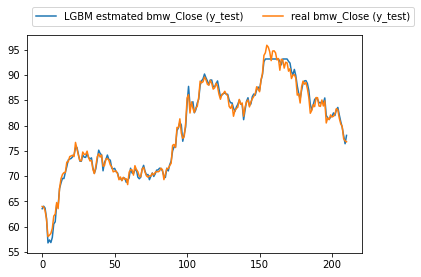

In [120]:
plt.plot(y_pred_lgbm, label="LGBM estmated bmw_Close (y_test)")
plt.plot(y_test, label="real bmw_Close (y_test)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2)
plt.show()

In [121]:
r2_score(y_test, y_pred_lgbm, multioutput='uniform_average')

0.9920698264905801

In [122]:
ytr_pred_lgbm = lgbm_model.predict(x_train)

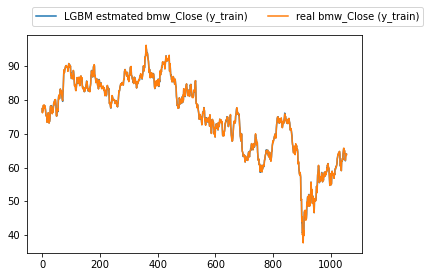

In [123]:
plt.plot(ytr_pred_lgbm, label="LGBM estmated bmw_Close (y_train)")
plt.plot(y_train, label="real bmw_Close (y_train)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2)
plt.show()

In [124]:
r2_score(y_train, ytr_pred_lgbm, multioutput='uniform_average')

0.9997817960158163

### XGboost

In [125]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(alpha=0.8,
                             reg_lambda=0.1,
                             learning_rate=0.1,
                             max_depth=7,
                             n_estimators=500,
                             subsample=0.6,random_state=42)

In [126]:
xgb_model.fit(x_train,y_train)
y_pred_xgb = xgb_model.predict(x_test)

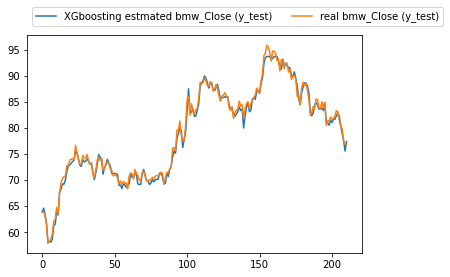

In [127]:
plt.plot(y_pred_xgb, label="XGboosting estmated bmw_Close (y_test)")
plt.plot(y_test, label="real bmw_Close (y_test)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2)
plt.show()

In [128]:
r2_score(y_test, y_pred_xgb, multioutput='uniform_average')

0.9923418401915248

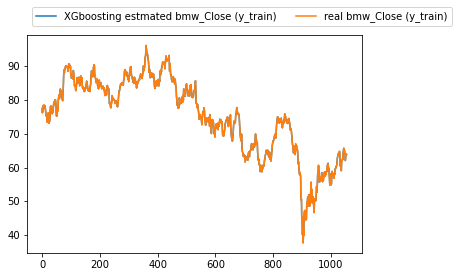

In [129]:
ytr_pred_xgb = xgb_model.predict(x_train)

plt.plot(ytr_pred_xgb, label="XGboosting estmated bmw_Close (y_train)")
plt.plot(y_train, label="real bmw_Close (y_train)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2)
plt.show()

In [131]:
r2_score(y_train, ytr_pred_xgb, multioutput='uniform_average')

0.9999743701899352

### RF

In [133]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(max_depth=11,
                                 n_estimators=600,
                                 random_state=42)

In [134]:
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)

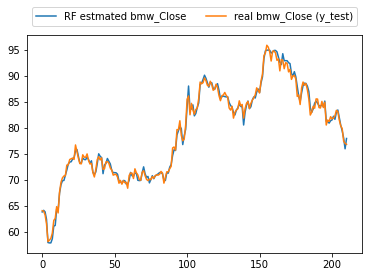

In [135]:
plt.plot(y_pred_rf, label="RF estmated bmw_Close")
plt.plot(y_test, label="real bmw_Close (y_test)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2)
plt.show()

In [136]:
r2_score(y_test, y_pred_rf, multioutput='uniform_average')

0.9940178466655951

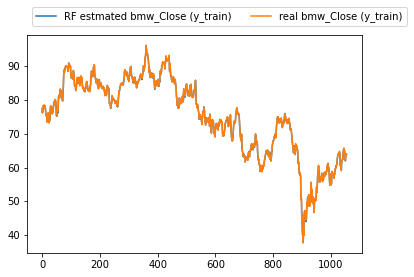

In [138]:
ytr_pred_rf = rf_model.predict(x_train)

plt.plot(ytr_pred_rf, label="RF estmated bmw_Close (y_train)")
plt.plot(y_train, label="real bmw_Close (y_train)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2)
plt.show()

In [139]:
r2_score(y_train, ytr_pred_rf, multioutput='uniform_average')

0.9997006816690278

### Geometric Mean

In [140]:
from scipy.stats.mstats import gmean 
y_pred_gmean = gmean([y_pred_lgbm,y_pred_xgb,y_pred_rf])
ytr_pred_gmean = gmean([ytr_pred_lgbm,ytr_pred_xgb,ytr_pred_rf])

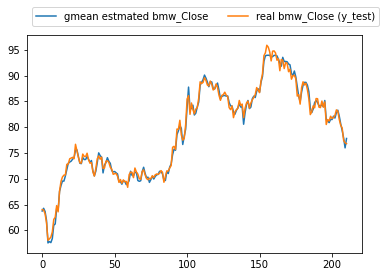

In [141]:
plt.plot(y_pred_gmean, label="gmean estmated bmw_Close")
plt.plot(y_test, label="real bmw_Close (y_test)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2)
plt.show()

In [142]:
r2_score(y_test, y_pred_gmean, multioutput='uniform_average')

0.9939132538303422

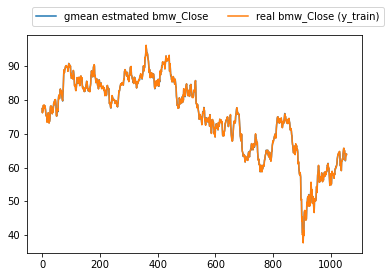

In [143]:
plt.plot(ytr_pred_gmean, label="gmean estmated bmw_Close")
plt.plot(y_train, label="real bmw_Close (y_train)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2)
plt.show()

In [144]:
r2_score(y_train, ytr_pred_gmean, multioutput='uniform_average')

0.9998837868421147

## Use gmean as feature to predict (Linear Regression)

In [145]:
X_test = y_pred_gmean
X_train = ytr_pred_gmean

In [146]:
X = np.concatenate((X_train,X_test))
X

array([77.45892516, 76.28563767, 77.11393741, ..., 77.90112568,
       75.9853848 , 77.80686925])

In [147]:
y

array([77.510002, 76.220001, 77.230003, ..., 77.43    , 76.980003,
       76.800003])

In [148]:
from sklearn import linear_model

In [160]:
LR = linear_model.LinearRegression()
LR.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [161]:
performance = LR.fit(X_train.reshape(-1,1), y_train)

In [162]:
print("训练集合上R^2 = {:.3f}".format(performance.score(X_train.reshape(-1,1), y_train)))
print("测试集合上R^2 = {:.3f} ".format(performance.score(X_test.reshape(-1,1), y_test)))

训练集合上R^2 = 1.000
测试集合上R^2 = 0.994 


In [163]:
y_LR=LR.predict(X_test.reshape(-1,1))

In [164]:
r2_score(y_test,y_LR, multioutput='uniform_average')

0.9939035196323217

### Ridge

#### GridSearchCV

In [152]:
LRRegr = linear_model.Ridge(random_state=42)

In [153]:
param_grid = {'alpha': [0.01, 0.1, 10]}
g_search = GridSearchCV(LRRegr, param_grid)
g_search.fit(X.reshape(-1,1), y)

GridSearchCV(estimator=Ridge(random_state=42),
             param_grid={'alpha': [0.01, 0.1, 10]})

In [383]:
g_search.best_params_

{'alpha': 0.01}

In [384]:
g_search.best_score_

0.9987943472914604

#### Predict

In [166]:
Ridge_model = linear_model.Ridge(alpha=10, random_state=42)

In [167]:
Ridge_model.fit(X_train.reshape(-1,1), y_train)

Ridge(alpha=10, random_state=42)

In [168]:
y_pred_Ridge = Ridge_model.predict(X_test.reshape(-1,1))

In [170]:
r2_score(y_test,y_pred_Ridge, multioutput='uniform_average')

0.9939051429397302

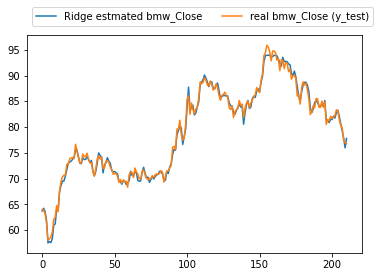

In [171]:
plt.plot(y_pred_Ridge, label="Ridge estmated bmw_Close")
plt.plot(y_test, label="real bmw_Close (y_test)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2)
plt.show()

### Lasso

#### GridSearchCV

In [172]:
LLRegr = linear_model.Lasso(random_state=42)

In [174]:
param_grid = {'alpha': [0.01, 0.1, 10]}
g_search = GridSearchCV(LLRegr, param_grid)
g_search.fit(X_train.reshape(-1,1), y_train)

GridSearchCV(estimator=Lasso(random_state=42),
             param_grid={'alpha': [0.01, 0.1, 10]})

In [175]:
g_search.best_params_

{'alpha': 0.01}

In [176]:
g_search.best_score_

0.9994623995194862

#### Predict

In [177]:
Lasso_model = linear_model.Lasso(alpha=0.01, random_state=42)

In [178]:
Lasso_model.fit(X_train.reshape(-1,1), y_train)

Lasso(alpha=0.01, random_state=42)

In [179]:
y_pred_Lasso = Lasso_model.predict(X_test.reshape(-1,1))

In [180]:
r2_score(y_test,y_pred_Lasso, multioutput='uniform_average')

0.9939052312721732

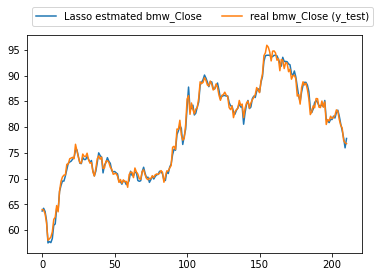

In [181]:
plt.plot(y_pred_Lasso, label="Lasso estmated bmw_Close")
plt.plot(y_test, label="real bmw_Close (y_test)")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=2)
plt.show()